# **DIT Test**

# Exploring the data with Jupyter Notebook

Author: Micah Guimarães do Carmo Navia

Contact: <a href='mailto:micahgcnavia@gmail.com'>micahgcnavia@gmail.com</a>

## Objectives

In this notebook I intend to:

*   Load the data
*   Explore and understand what each column means
*   Identify problems and guess what was the possible cause for each case
*   Find the best way to solve the problems
*   Retrieve the result set into a pandas dataframe ready for analysis
*   Deploy the transformations as a .py file for automation


---

Loading useful packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import ast
import uuid
from fractions import Fraction

Loading database

In [2]:
url = "https://drive.google.com/file/d/1dWC1ZUPNlCQBalYPY8uP4Zzs0aue9nkQ/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

try:
    df = pd.read_csv(path)
    print('Table loaded with success.')

except:
    print('Error when loading the table. Please contact the author to solve this issue.')

Table loaded with success.


## Initial analysis

In [3]:
# Let's take a look at the columns

df.columns

Index(['id_paciente', 'sexo', 'obito', 'bairro', 'raca_cor', 'ocupacao',
       'religiao', 'luz_eletrica', 'data_cadastro', 'escolaridade',
       'nacionalidade', 'renda_familiar', 'data_nascimento',
       'em_situacao_de_rua', 'frequenta_escola', 'meios_transporte',
       'doencas_condicoes', 'identidade_genero', 'meios_comunicacao',
       'orientacao_sexual', 'possui_plano_saude', 'em_caso_doenca_procura',
       'situacao_profissional', 'vulnerabilidade_social',
       'data_atualizacao_cadastro', 'familia_beneficiaria_auxilio_brasil',
       'crianca_matriculada_creche_pre_escola', 'altura', 'peso',
       'pressao_sistolica', 'pressao_diastolica',
       'n_atendimentos_atencao_primaria', 'n_atendimentos_hospital',
       'updated_at', 'tipo'],
      dtype='object')

In [5]:
df.head()

,id_paciente,sexo,obito,bairro,raca_cor,ocupacao,religiao,luz_eletrica,data_cadastro,escolaridade,...,familia_beneficiaria_auxilio_brasil,crianca_matriculada_creche_pre_escola,altura,peso,pressao_sistolica,pressao_diastolica,n_atendimentos_atencao_primaria,n_atendimentos_hospital,updated_at,tipo
0,cd6daa6e-038d-4952-af29-579e62e07f97,male,0,Parada de Lucas,Branca,Não se aplica,Sem religião,True,2021-06-24 00:00:00.000,Fundamental Incompleto,...,0,0,172.0,52.5,110.0,70.0,8,9,2021-06-01 00:00:00.000,historico
1,ad6cecb2-3a44-49ab-b2f3-6f9ffc2e2ec7,male,0,Cidade Nova,Parda,Assistente Administrativo,Evangélica,1,2021-01-07 00:00:00.000,Médio Incompleto,...,1,0,158.0,76.2,140.0,80.0,0,6,2020-06-25 00:00:00.000,historico
2,54e834e7-e722-4daa-8909-cf917a1247e6,male,0,Santa cruz,Parda,Não se aplica,Católica,1,2021-02-18 00:00:00.000,Fundamental Completo,...,0,0,53.0,82.5,180.0,60.0,5,2,2020-03-02 00:00:00.000,historico
3,c6a71e5e-0933-48d1-9d5a-8f448dc37f71,female,False,Bangu,Branca,Representante Comercial Autônomo,Sem religião,1,2022-03-09 10:40:37,Alfabetizado,...,1,1,164.0,90.6,120.0,70.0,0,27,2021-11-05 11:08:17.477,rotineiro
4,d5262a3c-e5d3-4195-a46b-0acd2533e1d6,male,0,Santíssimo,Branca,Técnico Eletricista,Outra,True,2022-12-13 18:30:45,Médio Completo,...,0,0,154.0,8.5,180.0,80.0,25,0,2020-11-11 00:00:00.000,historico


In [4]:
# Let's take a look at the quantitative data

df.describe()

,frequenta_escola,altura,peso,pressao_sistolica,pressao_diastolica,n_atendimentos_atencao_primaria,n_atendimentos_hospital
count,100000.000000,99975.000000,99816.000000,99960.000000,99983.000000,100000.000000,100000.000000
mean,0.158190,142.693589,63.801629,129.544068,79.378207,5.542710,7.312930
std,0.364921,38.659345,35.594173,21.406429,21.062140,5.204464,9.801987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,145.000000,50.700000,120.000000,70.000000,0.000000,0.000000
50%,0.000000,158.000000,67.900000,130.000000,80.000000,5.000000,2.000000
75%,0.000000,165.000000,82.000000,140.000000,87.000000,9.000000,13.000000
max,1.000000,810.000000,998.000000,900.000000,921.000000,32.000000,77.000000


In [6]:
df.columns

Index(['id_paciente', 'sexo', 'obito', 'bairro', 'raca_cor', 'ocupacao',
       'religiao', 'luz_eletrica', 'data_cadastro', 'escolaridade',
       'nacionalidade', 'renda_familiar', 'data_nascimento',
       'em_situacao_de_rua', 'frequenta_escola', 'meios_transporte',
       'doencas_condicoes', 'identidade_genero', 'meios_comunicacao',
       'orientacao_sexual', 'possui_plano_saude', 'em_caso_doenca_procura',
       'situacao_profissional', 'vulnerabilidade_social',
       'data_atualizacao_cadastro', 'familia_beneficiaria_auxilio_brasil',
       'crianca_matriculada_creche_pre_escola', 'altura', 'peso',
       'pressao_sistolica', 'pressao_diastolica',
       'n_atendimentos_atencao_primaria', 'n_atendimentos_hospital',
       'updated_at', 'tipo'],
      dtype='object')

## Detailed description of each column:

(As this project uses data from home visits in the city of Rio de Janeiro, its content is in portuguese)

* **Patient ID** (`id_paciente`): Used to uniquely identify each patient of the dataset

* **Sex** (`sexo`): Patient's sex

* **Death** (`obito`): Flag to indicate whether the patient died

* **Neighborhood** (`bairro`): Neighborhood where the patient currently lives

* **Race** (`raca_cor`): Patient's race

* **Occupation** (`ocupacao`): Patient's current job

* **Religion** (`religiao`): Patient's religion


* **Electricity** (`luz_eletrica`): Flag to indicate whether the patient has access to electricity

* **Register Date** (`data_cadastro`): Register date of the patient

* **Education** (`escolaridade`): Patient's education level

* **Nationality** (`nacionalidade`): Patient's nationality

* **Family Income** (`renda_familiar`): Patient's family income in minimum wages

* **Birth Date** (`data_nascimento`): Patient's birth date

* **Homeless** (`em_situacao_de_rua`): Flag to indicate whether the patient is homeless

* **Attend School** (`frequenta_escola`): Flag to indicate whether the patient attends school

* **Means of Transport** (`meios_transporte`): Means of transport used by the patient 

* **Deseases** (`doencas_condicoes`): Patient's deseases

* **Gender Identity** (`identidade_genero`): Patient's gender identity

* **Means of Communication** (`meios_comunicacao`): Means of communication used by the patient

* **Sexual Orientation** (`orientacao_sexual`): Patient's sexual orientation

* **Health Plan** (`possui_plano_saude`): Flag to indicate whether the patient has a health plan

* **Treatment Facility** (`em_caso_doenca_procura`): Location where the patient seeks health treatment when sick

* **Employment Status** (`situacao_profissional`): Patient's employment status

* **Social Vulnerability** (`vulnerabilidade_social`): Flag to indicate whether the patient is in a situation of social vulnerability

* **Register Update Date** (`data_atualizacao_cadastro`): Date of last register update

* **Family benefits from Auxilio Brasil** (`familia_beneficiaria_auxilio_brasil`): Flag to indicate whether the patient's family benefits from the social assistance program Auxilio Brasil

* **Child Enrolled in Daycare or Pre-school** (`crianca_matriculada_creche_pre_escola`): Flag to indicate whether the patient is enrolled in daycare or in a pre-school facility

* **Height** (`altura`): Patient's height in centimeters

* **Weight** (`peso`): Patient's weight in kilograms

* **Systolic Pressure** (`pressao_sistolica`): Patient's systolic pressure in XXX

* **Diastolic Pressure** (`pressao_diastolica`): Patient's diastolic pressure in XXX

* **# of Primary Care Visits** (`n_atendimentos_atencao_primaria`): Number of primary care visits in the last year

* **# of Hospital Visits** (`n_atendimentos_hospital`): Number of hospital visits in the last year

* **Update Date** (`updated_at`): Date and time of latest update in the database

* **Kind** (`tipo`): Indicates whether the data is from a routine or historical flux from the database


## Análise quantitativa dos dados:

In [11]:
quantitative_summary = data.describe()
quantitative_columns = list(data.describe().columns)
quantitative_summary

,frequenta_escola,altura,peso,pressao_sistolica,pressao_diastolica,n_atendimentos_atencao_primaria,n_atendimentos_hospital
count,100000.000000,99975.000000,99816.000000,99960.000000,99983.000000,100000.000000,100000.000000
mean,0.158190,142.693589,63.801629,129.544068,79.378207,5.542710,7.312930
std,0.364921,38.659345,35.594173,21.406429,21.062140,5.204464,9.801987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,145.000000,50.700000,120.000000,70.000000,0.000000,0.000000
50%,0.000000,158.000000,67.900000,130.000000,80.000000,5.000000,2.000000
75%,0.000000,165.000000,82.000000,140.000000,87.000000,9.000000,13.000000
max,1.000000,810.000000,998.000000,900.000000,921.000000,32.000000,77.000000


### Podemos verificar, imediatamente, que as colunas altura e peso, assim como as colunas de pressão apresentam valores máximos e mínimos muito distantes da média, considerando o desvio padrão. Para investigar esses problemas mais a fundo, podemos utilizar gráficos de caixa:

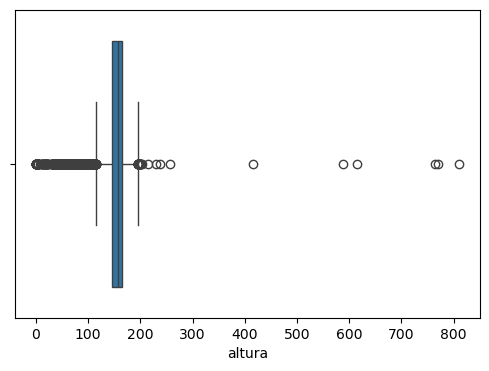

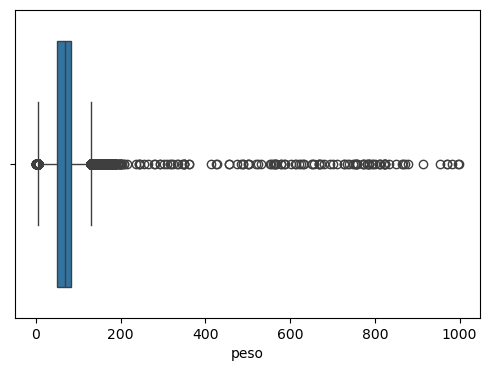

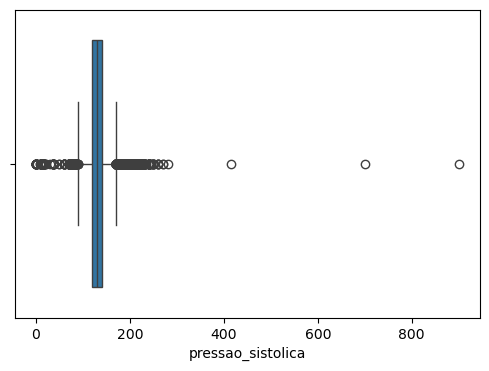

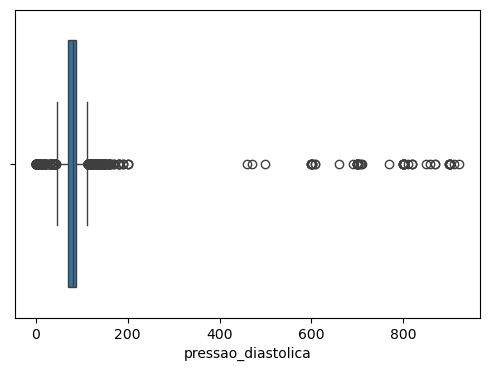

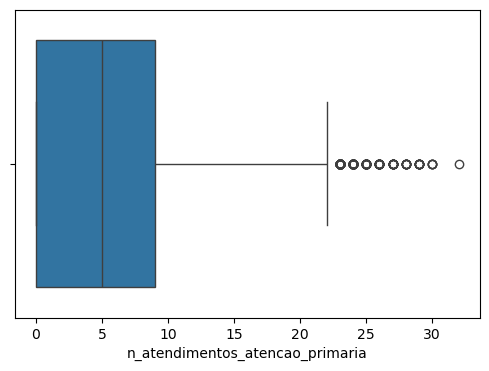

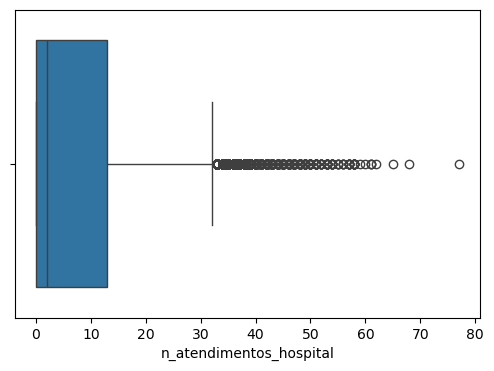

In [14]:
for col in quantitative_columns[1:]: # excluindo a coluna frequenta_escola pois só existem valores 0 ou 1.

    fig, ax = plt.subplots(figsize=(6,4), facecolor='white')
    sns.boxplot(x=data[col])
    plt.show()

In [ ]:
# Obtendo os quartis para cada caso:

for col in quantitative_columns[1:]:

    print(col+':')
    print('Q1 = ', data[col].quantile(0.25))
    print('Q2 = ', data[col].quantile(0.5))
    print('Q3 = ', data[col].quantile(0.75))

altura:
Q1 =  145.0
Q2 =  158.0
Q3 =  165.0
peso:
Q1 =  50.7
Q2 =  67.9
Q3 =  82.0
pressao_sistolica:
Q1 =  120.0
Q2 =  130.0
Q3 =  140.0
pressao_diastolica:
Q1 =  70.0
Q2 =  80.0
Q3 =  87.0
n_atendimentos_atencao_primaria:
Q1 =  0.0
Q2 =  5.0
Q3 =  9.0
n_atendimentos_hospital:
Q1 =  0.0
Q2 =  2.0
Q3 =  13.0


### Primeira impressão dos dados:

**Coluna altura:** parece ter sido preechida em centímetros, considerando os valores dos quartis. Existem valores muito discrepantes, acima de 400cm e abaixo de 40cm (considerando o tamanho de um bebê recém nascido). Palpite: uma provável fonte de erro seria a digitação incorreta no momento do preenchimento dos dados.


**Coluna peso:** parece ter sido preechida em quilogramas, considerando os valores dos quartis. Existem valores muito discrepantes, acima de 200 kg e muito próximos de zero (considerando que o peso de um bebê recém nascido geralmente está na faixa de 2 a 4 quilos). Palpite: assim como no caso da coluna altura, uma provável fonte de erro seria a digitação incorreta no momento do preenchimento dos dados.

**Colunas de pressão:** parecem ter sido preenchidas em mmHg pelos valores dos quartis. Como não sou da área da saúde, a princípio não saberia dizer se há valores discrepantes. Portanto, fiz uma pequena pesquisa:

- Pressão diastólica: para um adulto (+18 anos), consideram-se valores normais menores que 85 mmHg [(fonte)](https://bvsms.saude.gov.br/bvs/publicacoes/III_consenso_bras_hip_arterial.pdf).
- Pressão sistólica:para um adulto (+18 anos), consideram-se valores normais menores que 130 mmHg [(fonte)](https://bvsms.saude.gov.br/bvs/publicacoes/III_consenso_bras_hip_arterial.pdf).

Portanto, temos sim valores discrepantes para as duas colunas.

**Colunas de números de atendimentos:** ambas colunas se referem a atendimentos no último ano. Se considerarmos que uma pessoa teve dois atendimentos por semana, mantendo essa frequência durante todo o ano (2 dias vezes 4 semanas vezes 12 meses), ela terá feito 96 atendimentos no ano. Portanto, apesar de altos, os valores dessas duas colunas não parecem apresentar problemas, a princípio.



### Exoplorando altura e peso conjuntamente

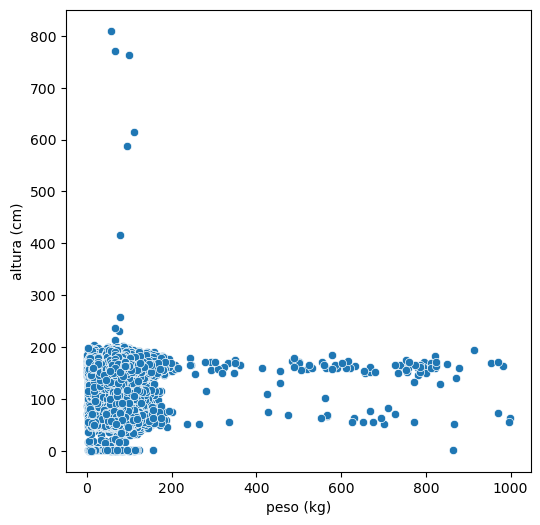

In [30]:
fig, ax = plt.subplots(figsize=(6,6), facecolor='white')
sns.scatterplot(x=data['peso'], y=data['altura'])
plt.xlabel('peso (kg)')
plt.ylabel('altura (cm)')
plt.show()

Podemos tentar identificar numericamente os pontos discrepantes usando o método IQR (intervalo interquartis):

In [ ]:
def calculate_IQR_lims(data, col, factor=1.5):

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_lim = Q1 - factor * IQR
    upper_lim = Q3 + factor * IQR

    return lower_lim, upper_lim

In [174]:
limites_altura = calculate_IQR_lims(data, 'altura')
limites_peso = calculate_IQR_lims(data, 'peso')

mediana_altura, mediana_peso = data['altura'].quantile(0.5), data['peso'].quantile(0.5)

print(f'Limites para altura: {round(limites_altura[0])} e {round(limites_altura[1])} cm. Mediana: {mediana_altura} cm.')
print(f'Limites para peso: {round(limites_peso[0])} e {round(limites_peso[1])} kg. Mediana: {mediana_peso} kg.')

Limites para altura: 115 e 195 cm. Mediana: 158.0 cm.
Limites para peso: 4 e 129 kg. Mediana: 67.9 kg.


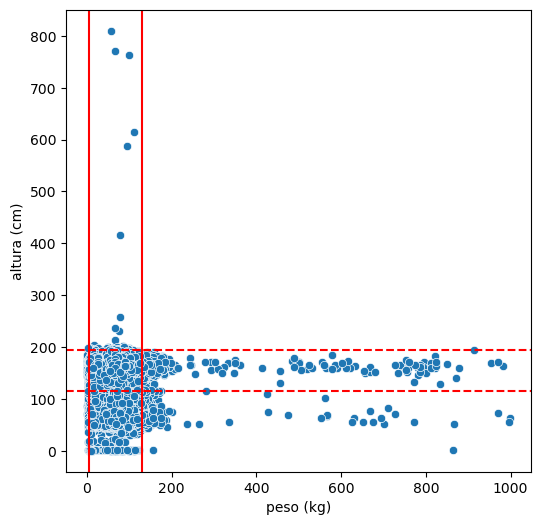

In [ ]:
fig, ax = plt.subplots(figsize=(6,6), facecolor='white')

sns.scatterplot(x=data['peso'], y=data['altura'])

# Acrescentando os limites para cada variável:

plt.axvline(x=limites_peso[0], ls='-', color='red')
plt.axvline(x=limites_peso[1], ls='-', color='red')

plt.axhline(y=limites_altura[0], ls='--', color='red')
plt.axhline(y=limites_altura[1], ls='--', color='red')

plt.xlabel('peso (kg)')
plt.ylabel('altura (cm)')
plt.show()

Agora temos uma noção melhor de quais dados podem ser, de fato, erros. Porém, como já haviamos mencionado, devemos considerar alturas e pesos de crianças também. Dessa forma, seria interessante estender o limite inferior de altura para 40 cm. Depois, podemos checar as colunas **data_nascimento** e **data_cadastro**, se isso faz sentido ou não.

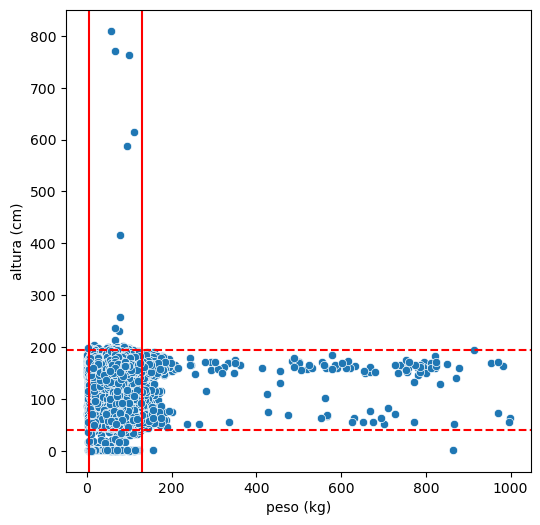

In [46]:
fig, ax = plt.subplots(figsize=(6,6), facecolor='white')

sns.scatterplot(x=data['peso'], y=data['altura'])

# Acrescentando os limites para cada variável:

plt.axvline(x=limites_peso[0], ls='-', color='red')
plt.axvline(x=limites_peso[1], ls='-', color='red')

plt.axhline(y=40, ls='--', color='red')
plt.axhline(y=limites_altura[1], ls='--', color='red')

plt.xlabel('peso (kg)')
plt.ylabel('altura (cm)')
plt.show()

Considerando as colunas **data_nascimento** e **data_cadastro**, nenhum dos registros obtidos faz sentido e devem ser considerados como pontos discrepantes. Além disso, podemos considerar a [tabela de IMC](https://www.msdmanuals.com/pt/profissional/multimedia/table/%C3%ADndice-de-massa-corporal-imc) para argumentar que os pontos fora da caixa contida entre os limites do IQR são medidas não representativas.

## Análise geral das colunas 

Para entender melhor como os dados estão estruturados, vamos analisar os valores únicos de cada coluna para tentar identificar alguns problemas mais evidentes. Para isso, aplicaremos a seguinte função:

In [66]:
def analyze_table(df):

    # Eliminando duplicatas exatas
    df = df.drop_duplicates()
    
    # Criar um dicionário para armazenar as informações das colunas
    column_info = {}

    random_state = np.random.seed(42) # Será usado para escolher valores aleatórios de cada coluna
    
    for col in df.columns:

        n_unique = df[col].nunique() # valores únicos

        N_unique = 20 # limite de valores únicos para mostrar
        N_example = 10 # número de valores para mostrar como exemplo dos dados

        column_info[col] = {
            'Tipo de dado detectado': df[col].dtype,
            'Quantidade de valores únicos': n_unique,
            'Valores únicos': df[col].unique() if n_unique <=N_unique else f'muitos (mais que {N_unique})', # se mais de 20 valores únicos foram detectados, não são mostrados
            'Valores nulos': df[col].isnull().sum(),
            'Total de valores': len(df[col]),
            'Exemplo de valores': df[col].dropna().sample(min(N_example, len(df[col])), random_state=random_state).tolist()  # Amostra de valores não nulos
        }
    
    # Exibir informações
    for col, info in column_info.items():
        print(f"Coluna: {col}")
        for key, value in info.items():
            print(f"  {key}: {value}")
        print("-" * 150)

In [67]:
analyze_table(data)

Coluna: id_paciente
  Tipo de dado detectado: object
  Quantidade de valores únicos: 99000
  Valores únicos: muitos (mais que 20)
  Valores nulos: 0
  Total de valores: 100000
  Exemplo de valores: ['02adc24d-6a86-4448-b53c-ee50c312173e', '8aeada81-5ff2-4f95-b7fc-fae6813f3210', '7ce423ab-1ec4-4bf2-9690-9f95a9c50eea', '057a8c9d-7e3d-4236-84ca-d72adbe826c4', '3a0ed825-55c4-44f9-b48a-4b551a6341d0', 'e0f5b913-ec92-452f-98ce-7cdcc93c92d5', '1668f0eb-58b9-4611-8398-3ebae46388ee', 'cc009e93-9a8f-4f07-b7cc-74f1fa2d375a', '1c192344-4b5f-4474-a4c9-9308301da950', 'b02d3f3a-ed86-478c-bdb8-6d47556c0156']
------------------------------------------------------------------------------------------------------------------------------------------------------
Coluna: sexo
  Tipo de dado detectado: object
  Quantidade de valores únicos: 2
  Valores únicos: ['male' 'female']
  Valores nulos: 0
  Total de valores: 100000
  Exemplo de valores: ['female', 'female', 'male', 'female', 'female', 'female', 'female

---

## Separando a análise em colunas com erros parecidos

### Erros do tipo 0, 1, True, False

As colunas: 
- **obito**
- **luz_eletrica**
- **em_situacao_de_rua**
- **possui_plano_saude**
- **vulnerabilidade_social**
- **familia_beneficiaria_auxilio_brasil**
- **crianca_matriculada_creche_pre_escola** 

**Problema:** Parecem apresentar o mesmo tipo de erro: são colunas cuja resposta contém valores de "Sim" ou "Não", representados pelos números 1 e 0, respectivamente, ou True e False.

**Possível causa do problema/Sugestões para próxima coleta:** Provavelmente o sistema de coleta não conseguiu identificar os valores True e False como booleanos, os tratando como strings. Orientar os agentes de saúde para dar de entrada apenas 0 ou 1.

**Solução:** Padronizar os valores para os números inteiros 0 e 1.

---

### Erros do tipo data

As colunas: 
- **data_cadastro**
- **data_nascimento**
- **data_atualizacao_cadastro**
- **updated_at**

**Problema:** Não necessariamente apresentam valores errados, mas não estão padronizados.

**Possível causa do problema/Sugestões para próxima coleta:** O sistema não coletou corretamente os milissegundos em algumas das colunas de data. 

**Solução:** Transformar os valores para o tipo _datetime_, para futuras análises de estatística inferencial.

---

### Erros do tipo listas como strings, formatação unicode inadequada e valores vazios

As colunas: 
- **meios_transporte**
- **doencas_condicoes**
- **meios_comunicacao**
- **em_caso_doenca_procura**

**Problema:** formatação incorreta (caracteres como acentos são retornados como código unicode), valores vazios que na verdade são do tipo '[]', listas dentro de strings.

**Possível causa do problema/Sugestões para próxima coleta:** O sistema de coleta não compreende corretamente quando uma lista de valores é dada de entrada. 

**Solução:** Padronizar os dados.

## Colunas com erros específicos

### Colunas identidade_genero e orientacao_sexual:

**Problema:** Em ambas, existem registros do tipo 'Homossexual (gay / lésbica)'. Na coluna identidade_genero, existem vários valores nulos, alguns valores 'Não' e 'Sim'.

**Possível causa do problema/Sugestões para próxima coleta:** Orientar o profissional de saúde para inserir apenas 'Homossexual' nos casos gay ou lésbica. As respostas 'Sim' e 'Não' podem estar relacionadas à falta de informação da pessoa que está sendo entrevistada ou a má interpretação da pessoa que está coletando os dados.

**Solução:** Transformar 'Sim', 'Não' e valores nulos para 'Não informado' e simplificar 'Homossexual (gay / lésbica)' para 'Homossexual'.

---

### Coluna raca_cor:

**Problema:** Algumas linhas com valor 'Não'. 

**Possível causa do problema/Sugestões para próxima coleta:** Nesse caso, pode ter acontecido do entrevistado não ter se sentido confortável em informar a raça.

**Solução:** Transformar 'Não' para 'Não deseja informar'.

---

### Coluna ocupacao:

**Problema:** Algumas linhas com subcategoria do trabalho entre parêntesis.

**Possível causa do problema/Sugestões para próxima coleta:** Como não existe uma coluna para a categoria de trabalho, a informação ficou encapsulada.

**Solução:** Extrair a informação da categoria quando houver e criar a coluna **categoria_ocupacao**.

---

### Coluna religiao:

**Problema:** Valores aleatórios ['Acomp. Cresc. e Desenv. da Criança', 'ORQUIDEA', 'ESB ALMIRANTE', '10 EAP 01'], 'Não', 'Sim', 'Sem religião'.

**Possível causa do problema/Sugestões para próxima coleta:** Provavelmente o agente de saúde preencheu o campo errado. 

**Solução:** Transformar valores aleatórios em 'Sem informação', 'Não' em 'Sem religião' e 'Sim' em 'Outra'.

---

### Coluna escolaridade:

**Problema:** 'Não sabe ler/escrever', 'Especialização/Residência'

**Possível causa do problema/Sugestões para próxima coleta:** O agente de saúde não foi devidamente orientado para preencher os dados. Valores com '/' dificultam a análise de dados. Orientar o agente para escrever apenas uma categoria.

**Solução:** Transformar valores 'Não sabe ler/escrever' em 'Iletrado' e 'Especialização/Residência' em 'Especialização ou Residência'.

---

### Coluna situacao_profissional:

**Problema:** 'Não se aplica' e 'Não trabalha' (mesma informação com duas tags diferentes), diferenciação em ter ou não ter previdência social, entrada incorreta: 'SMS CAPS DIRCINHA E LINDA BATISTA AP 33', detalhamento desnecessário: 'Médico Urologista', uso de '/': 'Pensionista / Aposentado'.

**Possível causa do problema/Sugestões para próxima coleta:** O agente de saúde não foi devidamente orientado para preencher os dados. Houve um erro de preenchimento de coluna para o valor 'SMS CAPS DIRCINHA E LINDA BATISTA AP 33'. A separação entre emprego formal e informal não enquadrou o caso 'Médico Urologista'. Orientar agente para inserir apenas uma categoria, por exemplo: 'Pensionista' OU 'Aposentado'.

**Solução:** Transformar valores 'Não se aplica' e 'Não trabalha' em 'Desempregado', 'SMS CAPS DIRCINHA E LINDA BATISTA AP 33' em 'Não informado', 'Médico Urologista' em 'Emprego Formal' e 'Pensionista / Aposentado' em 'Pensionista ou Aposentado'. Criar a coluna **previdencia_social** para conter informação se a pessoa tem ou não previdência social e estabelecer regras para cada categoria.

---

### Coluna renda_familiar:

**Problema:** medida em salários mínimos. Categorias erradas: 'Manhã' e 'Internet'.

**Possível causa do problema/Sugestões para próxima coleta:** Preenchimento da coluna errada pelo agente de saúde para as entradas 'Manhã' e 'Internet'. 

**Solução:** Ao invés de escrever 'Salário mínimo' em cada entrada, manter apenas o valor numério, transformando frações em float, quando necessário. Substituir o valor 'Mais de 4 Salários Mínimos' por '+4'.

---

### Coluna id_paciente:

**Problema:** valores repetidos (duplicatas e triplicatas).

**Possível causa do problema/Sugestões para próxima coleta:** pode ter ocorrido do agente de saúde ter coletado os dados usando a mesma ID do entrevistado anterior, por falta de atenção. O sistema de coleta deveria colocar uma trava de segurança para não permitir valores repetidos nessa coluna.

**Solução:** A solução para essa coluna é mais aprofundada, devido ao significado dessa coluna. Idealmente, cada ID deveria representar um único paciente. No entanto, com entradas repetidas, temos dois possíveis cenários:

1) É, de fato, o mesmo paciente, mas com registro atualizado;
2) Se trata de outra pessoa, mas com o mesmo ID;

Para investigar isso, a melhor abordagem seria verificar a quantidade de colunas com valores diferentes para cada duplicata. Se a **data_nascimento** variar, então trata-se do segundo cenário. Do contrário, o primeiro cenário deve ser considerado. Cabe aqui uma discussão interessante, no contexto dos pacientes transgêneros que podem ter mudado de sexo entre duas visitas diferentes. Para isso, ressalto a importância do preenchimento correto da coluna 'identidade_genero'.

A solução para o primeiro cenário é deletar o(s) registro(s) antigo(s), mantendo apenas o atual, filtrando pela coluna **data_atualizacao_cadastro**. Já a solução para o segundo cenário é gerar um novo ID e fazer a substituição para os valores repetidos. Como o banco de dados está em constante atualização, essa solução não é a mais adequada, mas pode ser um paliativo até o problema do sistema se resolver.

Outro fator a se considerar, é se todas as entradas dessa coluna obedecem o padrão UUID estabelecido.

---

## Colunas sem erros aparentes

- **sexo**
- **bairro**
- **nacionalidade**
- **frequenta_escola**
- **tipo**

Todas apresentam valores únicos sem problemas de formatação ou contexto.

---